In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [3]:
df = pd.read_excel("C:/Users/sarve/AppData/Local/Programs/Python/Python313/Python Projects/netflix_titles.xlsx")
df.head()

,Show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.describe()

,release_year
count,8809.000000
mean,2014.181292
std,8.818932
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2024.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [6]:
df.isnull().sum()

Show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.columns

Index(['Show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
#Covert date column
df['date_added'] = df['date_added'].str.strip()
df["date_added"] = pd.to_datetime(df["date_added"])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['release_year'] = df['release_year'].astype(int)

#filling NA values
df['country'].fillna("Unknown", inplace = True)
df['rating'].fillna("Unknown", inplace = True)

df.head()

C:\Users\sarve\AppData\Local\Temp\ipykernel_44552\2245524473.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna("Unknown", inplace = True)
C:\Users\sarve\AppData\Local\Temp\ipykernel_44552\2245524473.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

,Show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


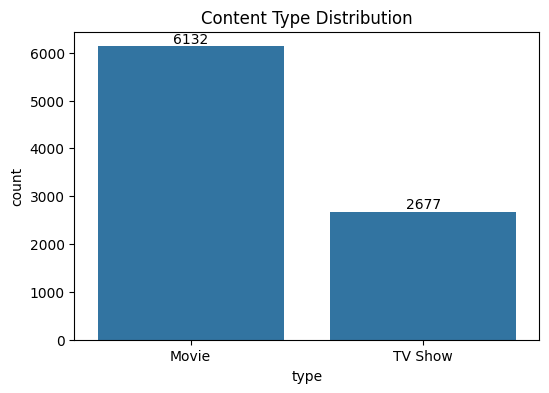

In [9]:
#content type distribution
plt.figure(figsize = (6, 4))
ax = sns.countplot(x = 'type', data = df)
ax.bar_label(ax.containers[0])
plt.title("Content Type Distribution")
plt.show()

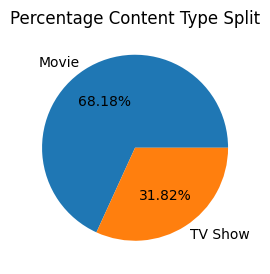

In [10]:
#pie distribution of show type
df1 = df[df['release_year'] > 2000]
df2 = df1.groupby("type").agg({"type":"count"})
plt.figure(figsize = (3, 4))
plt.pie(df2["type"], labels = df2.index, autopct = "%1.2f%%")
plt.title("Percentage Content Type Split")
plt.show()

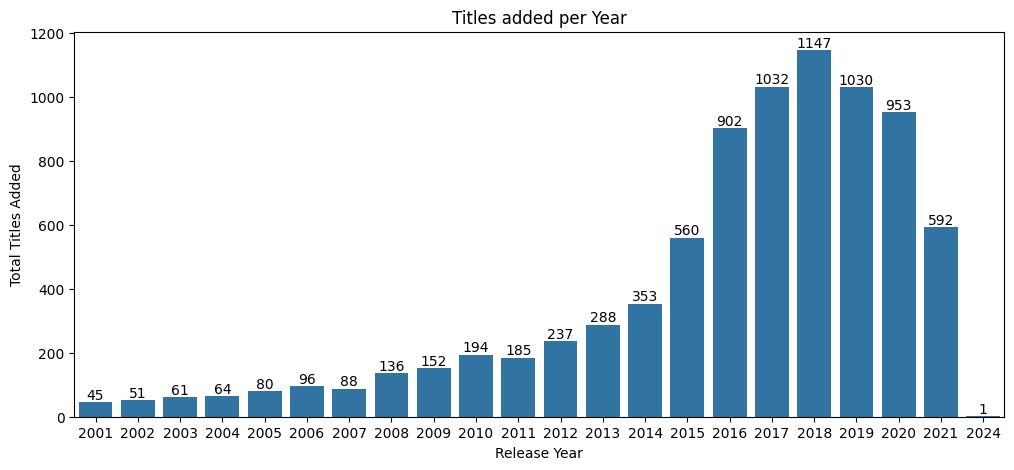

In [11]:
#Title type distribution
plt.figure(figsize = (12, 5))
ax = sns.countplot(x = 'release_year', data = df1)
ax.bar_label(ax.containers[0])
plt.title("Titles added per Year")
plt.xlabel("Release Year")
plt.ylabel("Total Titles Added")
plt.show()

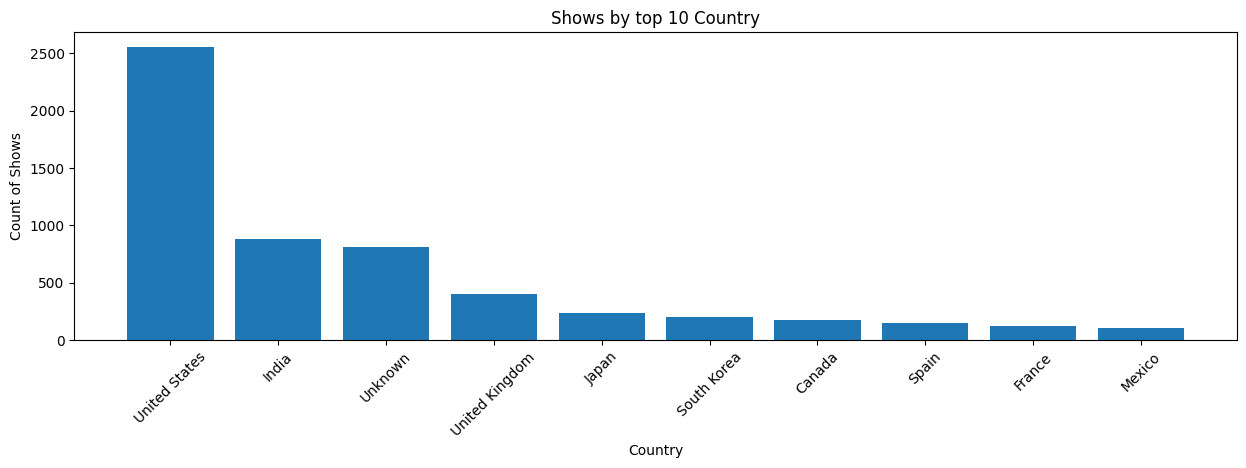

In [12]:
#find top 10 countries with highest number of show release
df_top10_inter = df1.groupby("country").agg({"title": "count"}).reset_index().sort_values(by = "title", ascending = False)
df_top10 = df_top10_inter.head(10)

#plot top 10 countries on graph
plt.figure(figsize = (15, 4))
ax = plt.bar(df_top10["country"], df_top10["title"])
plt.xticks(rotation = 45)
plt.title("Shows by top 10 Country")
plt.xlabel("Country")
plt.ylabel("Count of Shows")
plt.show()

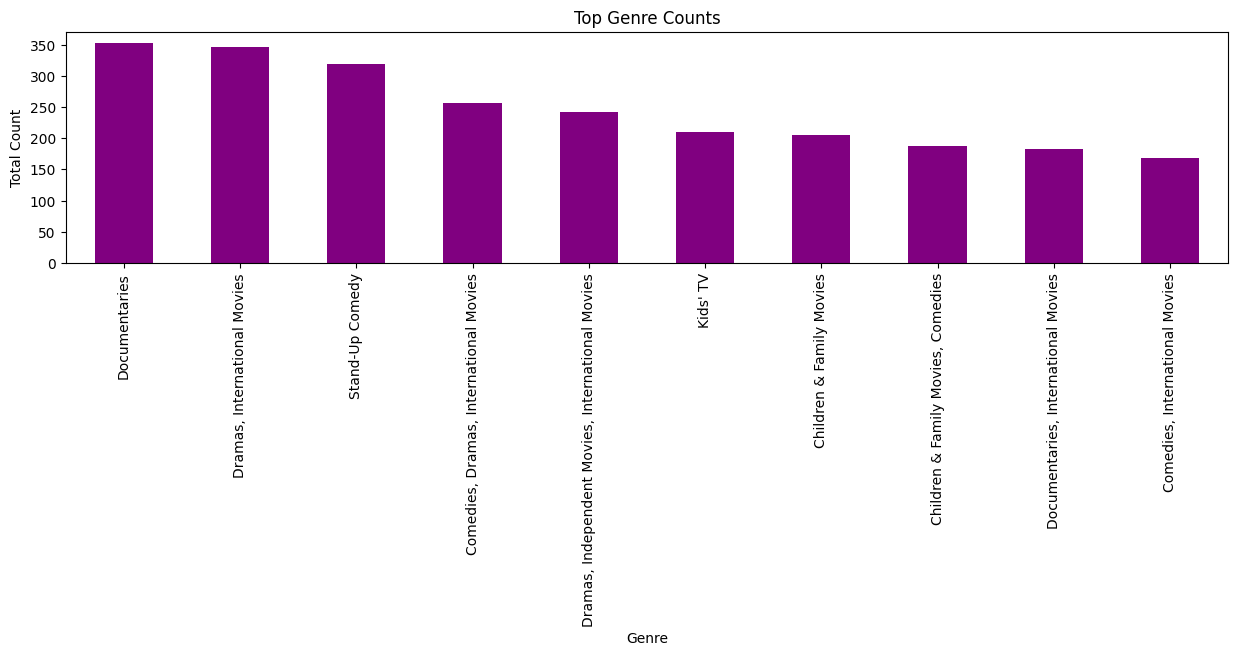

In [13]:
#Top common Genre of shows
plt.figure(figsize = (15, 3))
df1["listed_in"].value_counts().head(10).plot(kind = "bar", color = "Purple")
plt.xlabel("Genre")
plt.ylabel("Total Count")
plt.title("Top Genre Counts")
plt.show()

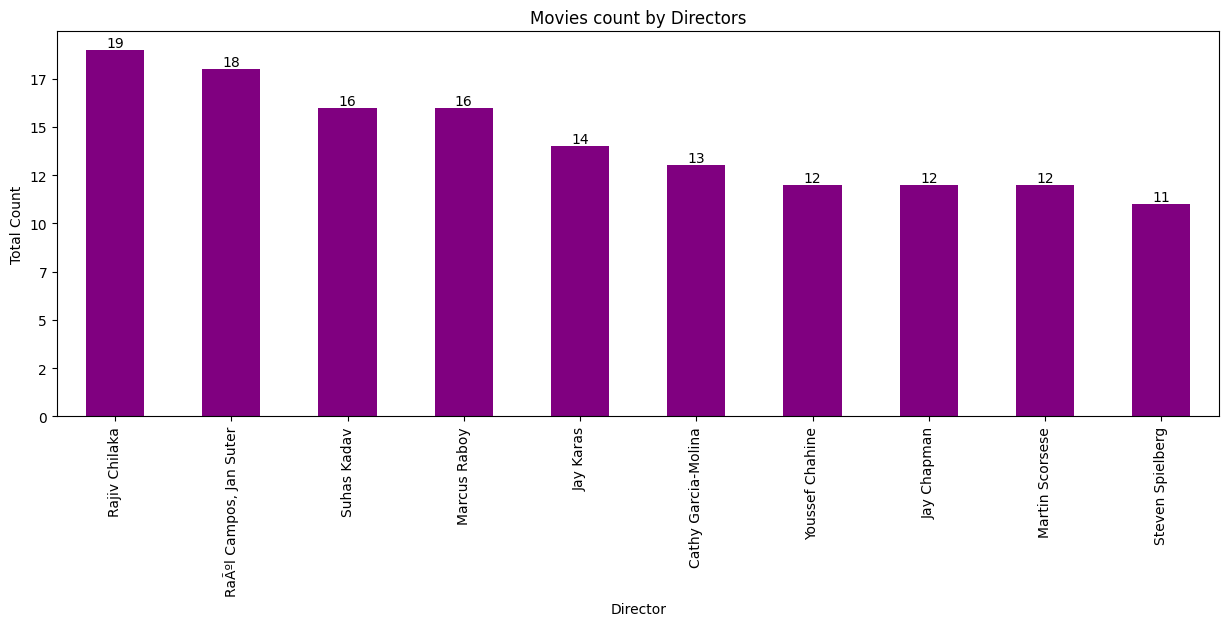

In [14]:
#Top Director of shows till now
plt.figure(figsize = (15, 5))
ax = df["director"].value_counts().head(10).plot(kind = "bar", color = "Purple")
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
ax.bar_label(ax.containers[0])
plt.xlabel("Director")
plt.ylabel("Total Count")
plt.title("Movies count by Directors")
plt.show()

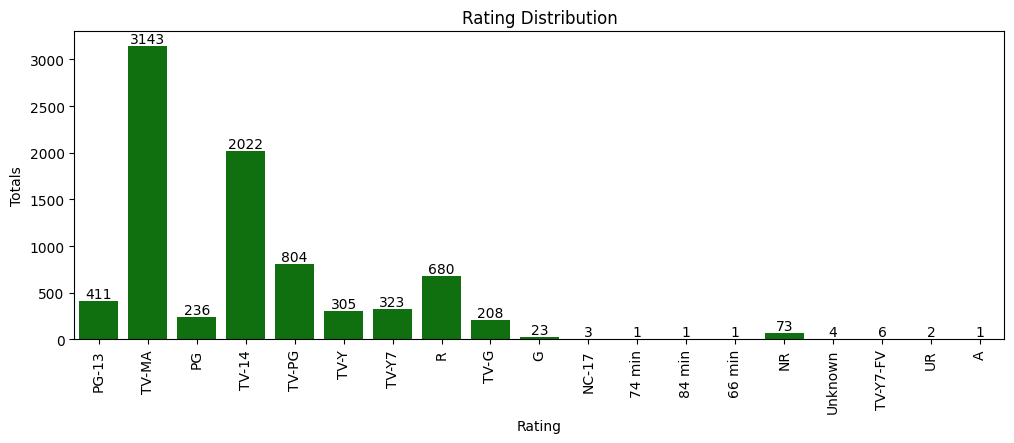

In [15]:
#Rating Distribution in bar plot
plt.figure(figsize = (12, 4))
ax = sns.countplot(x = "rating", data = df1, color = "green")
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Totals")
plt.show()

C:\Users\sarve\AppData\Local\Temp\ipykernel_44552\368839098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies["duration_mins"] = df_movies["duration"].str.replace(" min", "").astype(float)


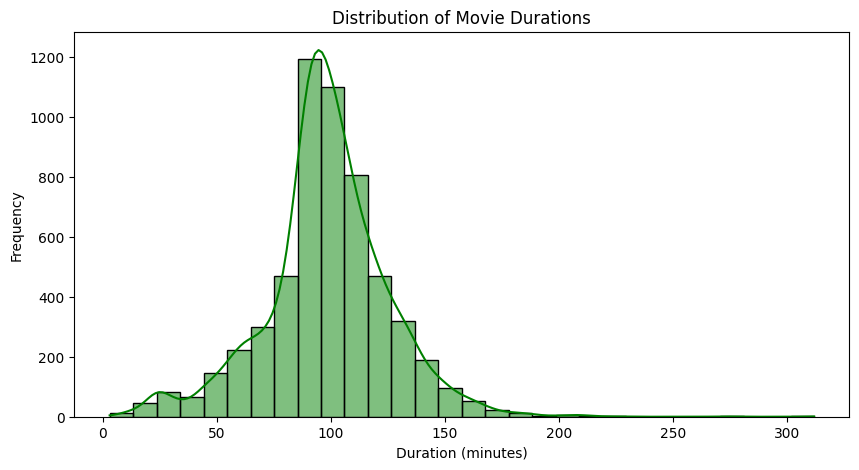

In [17]:
#Distribution of movies by duration of time
df_movies = df1[df1["type"] == "Movie"]  
df_movies["duration_mins"] = df_movies["duration"].str.replace(" min", "").astype(float)

#plotting histogram
plt.figure(figsize=(10,5))
sns.histplot(df_movies['duration_mins'].dropna(), bins=30, kde=True, color='green')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()